In [0]:

#connect drive with colab notebook/
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Thu Feb 27 16:49:58 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.48.02    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
!pip install -U efficientnet==0.0.4
!pip install keras-rectified-adam


  Created wheel for efficientnet: filename=efficientnet-0.0.4-cp36-none-any.whl size=14288 sha256=65c8135c1261f975d35153be530647d10c76e35bed32550b8997709ef869cd4d
  Stored in directory: /root/.cache/pip/wheels/5c/34/68/a611a699a28239e964ccf144c0e767cdb5439fee82ec5de6e0
Successfully built efficientnet
  Created wheel for keras-rectified-adam: filename=keras_rectified_adam-0.17.0-cp36-none-any.whl size=14781 sha256=887696480c38eba1f0b108154cb43eefedbab65810afb086599831892e15c3eb
  Stored in directory: /root/.cache/pip/wheels/7b/01/27/3a934e1a5644f5b93c720422a6ef97034ea78a21ba71cfb549
Successfully built keras-rectified-adam


EfficientNetB0 - (224, 224, 3)  
EfficientNetB1 - (240, 240, 3)  
EfficientNetB2 - (260, 260, 3)  
EfficientNetB3 - (300, 300, 3)  
EfficientNetB4 - (380, 380, 3)  
EfficientNetB5 - (456, 456, 3)  
EfficientNetB6 - (528, 528, 3)  
EfficientNetB7 - (600, 600, 3)  

https://github.com/keras-team/keras/issues/8130
https://stackoverflow.com/questions/56796331/how-to-input-multiple-images-with-flow-from-dataframe-in-keras

In [0]:
#following are libraries to unpack 7z file
!pip install patool 
!pip install pyunpack
from pyunpack import Archive

     |████████████████████████████████| 81kB 2.7MB/s 
  Created wheel for pyunpack: filename=pyunpack-0.1.2-cp36-none-any.whl size=5163 sha256=1b1d48ef89614856772cd2ff82b058810b2e28ae83696f6e3f86ef91f2da46a3
  Stored in directory: /root/.cache/pip/wheels/af/44/08/60613970881e542c0baad1f2dea5ed8e6716bc573f49197b7e
Successfully built pyunpack


In [0]:
import pandas as pd
import numpy as np
import cv2

In [0]:

#create a folder name as data
!mkdir data

In [0]:
#path where our data is saved
path='/content/drive/My Drive/thesis/'

In [0]:
#extract the 7z file in data folder we created above
#this not only extract the data but move it from drive to colab for efficinet processing
#it will take some time
Archive(path+'ODIR-5K_Training_Images.7z').extractall('data')

In [0]:
Archive(path+'ODIR-5K_Testing_Images.7z').extractall('data')


In [0]:
#read the annottion file
annotation=pd.read_excel(path+'ODIR-5K_Training_Annotations(Updated)_V2.xlsx')

In [0]:

#normal (N), diabetes (D), glaucoma (G), cataract (C), AMD (A), hypertension (H), myopia (M) and other diseases/abnormalities (O)

In [0]:
#print first 5 rows of annotation file
#annotation=annotation.sample(frac=1)
annotation.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1
3,3,66,Male,3_left.jpg,3_right.jpg,normal fundus,branch retinal artery occlusion,0,0,0,0,0,0,0,1
4,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1


In [0]:
from sklearn.model_selection import train_test_split
annotation, val = train_test_split(annotation, test_size = 0.2)

In [0]:
# for i in ['G',	'C',	'A',	'H',	'M']:
#   duplicate=annotation[annotation[i]==1]
#   annotation=annotation.append([duplicate]*10,ignore_index=True)

In [0]:
annotation.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
1947,2570,53,Male,2570_left.jpg,2570_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
1670,2213,83,Female,2213_left.jpg,2213_right.jpg,cataract，lens dust,cataract,0,0,0,1,0,0,0,0
2653,3276,50,Male,3276_left.jpg,3276_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
2734,3357,69,Male,3357_left.jpg,3357_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
2166,2789,54,Female,2789_left.jpg,2789_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0


In [0]:
val.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
2372,2995,53,Male,2995_left.jpg,2995_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
1030,1054,59,Male,1054_left.jpg,1054_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
3102,4243,56,Female,4243_left.jpg,4243_right.jpg,severe nonproliferative retinopathy,post retinal laser surgery，moderate non prolif...,0,1,0,0,0,0,0,1
3087,4227,66,Male,4227_left.jpg,4227_right.jpg,moderate non proliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0
561,562,73,Male,562_left.jpg,562_right.jpg,severe nonproliferative retinopathy,severe nonproliferative retinopathy,0,1,0,0,0,0,0,0


In [0]:
for i in ['N'	,'D'	,'G',	'C',	'A'	,'H'	,'M',	'O']:
  print(val[i].value_counts())

0    464
1    236
Name: N, dtype: int64
0    482
1    218
Name: D, dtype: int64
0    660
1     40
Name: G, dtype: int64
0    656
1     44
Name: C, dtype: int64
0    669
1     31
Name: A, dtype: int64
0    683
1     17
Name: H, dtype: int64
0    661
1     39
Name: M, dtype: int64
0    516
1    184
Name: O, dtype: int64


In [0]:
# val=[]
# for i in ['N'	,'D'	,'G',	'C',	'A'	,'H'	,'M',	'O']:
#   df=annotation.sort_values(by=[i],ascending=False).head(20)
#   val.append(df)
#   annotation.drop(df.index,inplace=True)


In [0]:
# val = pd.concat(val)
# val=val.sample(frac=1)
# val.head(5)

In [0]:
test=pd.read_csv(path+'XYZ_ODIR.csv')
print(len(test))
test.head()


500


,ID,N,D,G,C,A,H,M,O
0,937,0,0,0,0,0,0,0,0
1,967,0,0,0,0,0,0,0,0
2,988,0,0,0,0,0,0,0,0
3,995,0,0,0,0,0,0,0,0
4,1000,0,0,0,0,0,0,0,0


In [0]:
print(len(annotation))
print(len(val))
print(len(test))

2800
700
500


In [0]:
left_test=[]
right_test=[]
ID=[]
for i in test['ID']:
  ID.append(i)
  left_test.append(str(i)+'_left.jpg')
  right_test.append(str(i)+'_right.jpg')

name_df=pd.DataFrame(zip(ID,left_test,right_test),columns=['ID','Left-Fundus','Right-Fundus'])
name_df.head()
result = pd.merge(name_df, test, on='ID')
result.head()

,ID,Left-Fundus,Right-Fundus,N,D,G,C,A,H,M,O
0,937,937_left.jpg,937_right.jpg,0,0,0,0,0,0,0,0
1,967,967_left.jpg,967_right.jpg,0,0,0,0,0,0,0,0
2,988,988_left.jpg,988_right.jpg,0,0,0,0,0,0,0,0
3,995,995_left.jpg,995_right.jpg,0,0,0,0,0,0,0,0
4,1000,1000_left.jpg,1000_right.jpg,0,0,0,0,0,0,0,0


In [0]:
len(annotation)

2800

In [0]:
img_shape=300

In [0]:
#https://www.kaggle.com/ratthachat/aptos-eye-preprocessing-in-diabetic-retinopathy
def crop_image1(img,tol=7):
    # img is image data
    # tol  is tolerance
        
    mask = img>tol
    return img[np.ix_(mask.any(1),mask.any(0))]

def crop_image_from_gray(img,tol=7):
    if img.ndim ==2:
        mask = img>tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    elif img.ndim==3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img>tol
        
        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0): # image is too dark so that we crop out everything,
            return img # return original image
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
    #         print(img1.shape,img2.shape,img3.shape)
            img = np.stack([img1,img2,img3],axis=-1)
    #         print(img.shape)
        return img

In [0]:
def load_ben_color(image, sigmaX=10):
    #image = cv2.imread(path)
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = crop_image_from_gray(image)
    image = cv2.resize(image, (img_shape, img_shape))
    image=cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , sigmaX) ,-4 ,128)
    
    
    return image

In [0]:
from keras_preprocessing.image import ImageDataGenerator

train_data_gen= ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=180,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=.1,
    rescale=1/255,
    fill_mode='nearest',
    shear_range=0.1,
    brightness_range=[0.5, 1.5],
    preprocessing_function=load_ben_color
)

val_data_gen= ImageDataGenerator(
    rescale=1/255
    
)

In [0]:
def get_flow_from_dataframe(generator, dataframe,directory_path,
                            image_shape=(img_shape, img_shape),
                            #subset='training',
                             batch_size=35):
    train_generator_1 = generator.flow_from_dataframe(dataframe,
                                                      directory=directory_path,
                                                      target_size=(img_shape,img_shape),
                                                      x_col="Left-Fundus",
                                                      y_col=['N'	,'D'	,'G',	'C',	'A'	,'H'	,'M',	'O'],
                                                      class_mode='other',
                                                      shuffle=False,
                                                      batch_size=batch_size,
                                                      seed=7,
                                                      classes=['N'	,'D'	,'G',	'C',	'A'	,'H'	,'M',	'O']
                                                      #subset=subset
                                                      )

    train_generator_2 = generator.flow_from_dataframe(dataframe, 
                                                      directory=directory_path,
                                                      target_size=(img_shape,img_shape),
                                                      x_col="Right-Fundus",
                                                      y_col=['N'	,'D'	,'G',	'C',	'A'	,'H'	,'M',	'O'],
                                                      class_mode='other',
                                                      shuffle=False,
                                                      batch_size=batch_size,
                                                      seed=7,
                                                      classes=['N'	,'D'	,'G',	'C',	'A'	,'H'	,'M',	'O']                                                     
                                                      #subset=subset
                                                      )
    while True:
        x_1 = train_generator_1.next()
        x_2 = train_generator_2.next()

        yield [x_1[0], x_2[0]], x_1[1]

In [0]:
batch_size=15
train_gen = get_flow_from_dataframe(train_data_gen, annotation, image_shape=(img_shape, img_shape),
                                        directory_path="data/ODIR-5K_Training_Dataset/",batch_size=batch_size)
valid_gen = get_flow_from_dataframe(train_data_gen, val, image_shape=(img_shape, img_shape),
                                        directory_path="data/ODIR-5K_Training_Dataset/",batch_size=batch_size)
test_gen = get_flow_from_dataframe(train_data_gen, result, image_shape=(img_shape, img_shape),
                                        directory_path="data/ODIR-5K_Testing_Images/",batch_size=batch_size)

In [0]:
img_shape

300

In [0]:
from keras.models import Sequential,Model
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPool2D, BatchNormalization,Input,MaxPooling2D,GlobalMaxPooling2D,concatenate
from keras.layers import GlobalAveragePooling2D
from keras.applications.resnet50 import ResNet50
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

Using TensorFlow backend.


In [0]:

from efficientnet import EfficientNetB3
from keras.applications.inception_resnet_v2 import InceptionResNetV2
import keras
left_input=Input(shape=(img_shape,img_shape,3))
right_input=Input(shape=(img_shape,img_shape,3))

left_model = InceptionResNetV2(input_shape =  (img_shape,img_shape,3), include_top = False, weights = 'imagenet',input_tensor=left_input)
right_model = InceptionResNetV2(input_shape =  (img_shape,img_shape,3), include_top = False, weights = 'imagenet',input_tensor=right_input)

left_model.trainable = False
right_model.trainable = False

219062272/219055592 [==============================] - 3s 0us/step


In [0]:
con = concatenate([left_model.output, right_model.output])
gap_dr = Dropout(0.5)(con)
GAP= GlobalAveragePooling2D()(gap_dr)
fc1=Dense(256, activation = 'relu')(GAP)
fc2=Dense(128, activation = 'relu')(fc1)
fc3=Dense(64, activation = 'relu')(fc2)
out = Dense(8, activation = 'sigmoid')(fc3)

In [0]:

for layer in right_model.layers:
        layer.name = layer.name + '_right'
for layer in left_model.layers:
  layer.name = layer.name + '_left'

left_model.name="left_eff"
right_model.name="right_eff"

In [0]:
model =Model(inputs=[left_input, right_input], outputs=out)


In [0]:
# from keras.utils import plot_model
# plot_model(model)

In [0]:
import keras.backend as K
def focal_loss(y_true, y_pred, alpha = 0.75, gamma = 2):
  alpha_factor = K.ones_like(y_true) * alpha
  alpha_factor = tf.where(K.equal(y_true, 1), alpha_factor, 1 - alpha_factor)
  focal_weight = tf.where(K.equal(y_true, 1), 1 - y_pred, y_pred)
  focal_weight = alpha_factor * focal_weight ** gamma
  loss = focal_weight * K.binary_crossentropy(y_true, y_pred)
  return loss

In [0]:
from keras_radam import RAdam

model.compile('adam',loss=focal_loss,metrics=['accuracy'])

In [0]:
step_size_train=len(annotation)/batch_size
step_size_val=len(val)/batch_size


In [0]:
from keras.callbacks import ReduceLROnPlateau,ModelCheckpoint
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=2, min_lr=0.000001, verbose=1)
checkpoint = ModelCheckpoint('model.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')


In [0]:
hist=model.fit_generator(train_gen, epochs=20,
                        steps_per_epoch=step_size_train,
                        use_multiprocessing=True,
                        validation_data=valid_gen,
                        validation_steps=step_size_val,
                        verbose=2,callbacks=[reduce_lr,checkpoint],
                    
                        )

Epoch 1/20


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:211: UserWarning: `classes` will be ignored given the class_mode="raw"
  .format(self.class_mode))


Found 2800 validated image filenames.
Found 2800 validated image filenames.


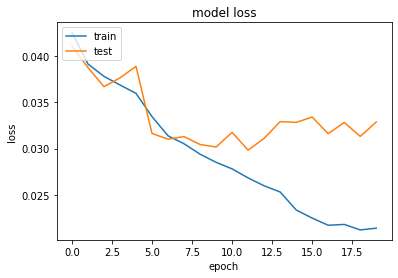

In [0]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
y_pred = model.predict_generator(valid_gen,steps=step_size_val)


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:211: UserWarning: `classes` will be ignored given the class_mode="raw"
  .format(self.class_mode))


Found 700 validated image filenames.
Found 700 validated image filenames.


In [0]:
y_pred1=y_pred.copy()
y_pred1[y_pred1>=0.5] = 1
y_pred1[y_pred1<0.5] = 0
y_pred1=y_pred1.astype(int)

In [0]:
y_true=val.iloc[:,-8::].values
y_true.shape

(700, 8)

In [0]:
from sklearn.metrics import classification_report,cohen_kappa_score
cohen_kappa_score(y_true.flatten(), y_pred1.flatten())

0.5371633172237156

In [0]:
y_test= model.predict_generator(test_gen,steps=len(test)/batch_size)


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:211: UserWarning: `classes` will be ignored given the class_mode="raw"
  .format(self.class_mode))


Found 500 validated image filenames.
Found 500 validated image filenames.


In [0]:
for i,j in enumerate(['N'	,'D'	,'G',	'C',	'A'	,'H'	,'M',	'O']):
  test[j]=y_test[:,i]

In [0]:
test.head()

,ID,N,D,G,C,A,H,M,O
0,937,0.651635,0.399774,0.328303,0.237847,0.066767,0.306714,0.015318,0.413533
1,967,0.368327,0.727004,0.082518,0.053936,0.169566,0.252646,0.045192,0.495152
2,988,0.500509,0.552549,0.094909,0.255226,0.218156,0.278888,0.039702,0.588018
3,995,0.596181,0.523678,0.045621,0.056257,0.165243,0.230235,0.043564,0.475521
4,1000,0.422062,0.648696,0.144769,0.177086,0.158796,0.224937,0.026895,0.626080


In [0]:
test.to_csv('/content/TAC_ODIR.csv',index=False)

In [0]:
keras.backend.clear_session()
